In [6]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm #to create progress bar
import cv2 
import os

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau



### Constants

In [8]:
import os
import  imageio.v2 as imageio
import pandas as pd

In [ ]:

#os.chdir('F:\\akash\\CS539_project\\landsat_dhi\\rough')
os.chdir('F:\\akash\\CNN\\CNN_inputs\\')
absent = os.listdir("absent") #absent_50x50
present = os.listdir("present") #present_50x50
absentVec = []
presentVec = []
for img in absent:
       img = imageio.imread(f"absent/{img}")
       ar = img.flatten()
       absentVec.append(ar)    
absentdf = pd.DataFrame(absent)    
absentdf.insert(loc=0,column ="label",value=1)

for img in present:
       img = imageio.imread(f"present/{img}")
       ar = img.flatten()
       presentVec.append(ar)    
presentdf = pd.DataFrame(presentVec)    
presentdf.insert(loc=0,column ="label",value=0)

In [10]:
data = pd.concat([absentdf,presentdf])      
data = data.sample(frac=1)
data.shape

(4239, 30001)

In [11]:
data_train = data.drop('label',axis=1)
data_train.shape
X = np.array(data_train)
X = X.reshape(-1,100,100,3)  #-1 = 234 here, the no of the points
X.shape

(4239, 100, 100, 3)

In [12]:
from sklearn.model_selection import train_test_split
y = data.label
#x = data.drop('label',axis=1)

x_train,x_test,y_train,y_test=train_test_split(X[:,:,:,:],y,test_size=0.3) #X[:,:,:,1:21]

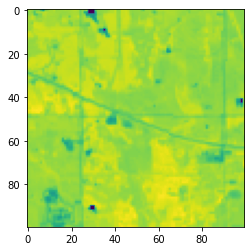

In [17]:
plt.imshow(X[193,:,:,0])

In [95]:
x_train.shape

(2967, 100, 100, 3)

In [42]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 1),strides=1))


model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(8, 8)))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(200, activation='relu')) #relu
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax')) # 5 because we have 5 classes

model.compile(loss='binary_crossentropy', optimizer="rmsprop",metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 16)        448       
                                                                 
 batch_normalization_6 (Batc  (None, 98, 98, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 98, 98, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 96, 32)        4640      
                                                                 
 batch_normalization_7 (Batc  (None, 96, 96, 32)       128       
 hNormalization)                                                 
                                                      

In [96]:
#model = Sequential()

#model.add(Conv2D(8, (11, 11), activation='relu', input_shape=(100,100,3)))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))


#model.add(Conv2D(16, (5, 5), activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(32, (7, 7), activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(64, (9, 9), activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))


#model.add(Flatten())
#model.add(Dense(100, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))
#model.add(Dense(2, activation='softmax')) # 5 because we have 5 classes

#model.compile(loss='binary_crossentropy', optimizer="rmsprop",metrics=['accuracy'])

#model.summary()

In [347]:
np.any(np.isnan(y_test))

False

In [43]:
tf.debugging.set_log_device_placement(True)
opt = tf.keras.optimizers.SGD(learning_rate=0.005)
model.compile(optimizer=opt,  # 'adam'
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #True
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, #batch_size = 200, 
                    validation_data=(x_test, y_test))

Epoch 1/50
93/93 [==============================] - 2s 16ms/step - loss: 0.5728 - accuracy: 0.7711 - val_loss: 0.7787 - val_accuracy: 0.6619
Epoch 2/50
93/93 [==============================] - 1s 13ms/step - loss: 0.2366 - accuracy: 0.9083 - val_loss: 0.3991 - val_accuracy: 0.8365
Epoch 3/50
93/93 [==============================] - 1s 13ms/step - loss: 0.1247 - accuracy: 0.9579 - val_loss: 0.2814 - val_accuracy: 0.8868
Epoch 4/50
93/93 [==============================] - 1s 12ms/step - loss: 0.0840 - accuracy: 0.9744 - val_loss: 0.4182 - val_accuracy: 0.8270
Epoch 5/50
93/93 [==============================] - 1s 8ms/step - loss: 0.0398 - accuracy: 0.9912 - val_loss: 0.2407 - val_accuracy: 0.9159
Epoch 6/50
93/93 [==============================] - 1s 9ms/step - loss: 0.0308 - accuracy: 0.9939 - val_loss: 0.2786 - val_accuracy: 0.9064
Epoch 7/50
93/93 [==============================] - 1s 11ms/step - loss: 0.0145 - accuracy: 0.9983 - val_loss: 0.3273 - val_accuracy: 0.8742
Epoch 8/50
93/9

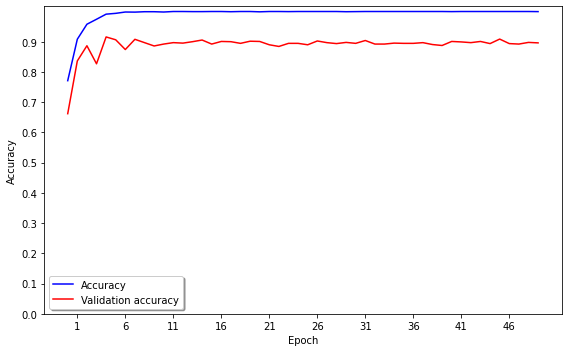

In [63]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.plot(history.history['accuracy'], color='b', label="Accuracy")
ax1.plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax1.set_xticks(np.arange(1, 50, 5))
ax1.set_yticks(np.arange(0, 1, 0.1))


plt.xlabel('Epoch')
plt.ylabel('Accuracy')

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

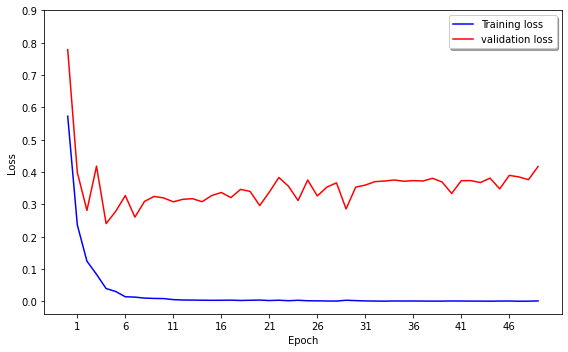

In [61]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 50, 5))
ax1.set_yticks(np.arange(0, 1, 0.1))


plt.xlabel('Epoch')
plt.ylabel('Loss')

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [26]:
import geopandas as gpd
import pandas as pd
from osgeo import gdal, gdal_array
import numpy as np
import matplotlib.pyplot as plt
import shapely
import fiona
import rasterio
from rasterio import plot
from rasterio.mask import mask
import pyrsgis

In [92]:
from pyrsgis.ml import imageChipsFromArray
from pyrsgis import raster
import pyrsgis
ds, featuresHyderabad = raster.read('F:\\akash\\CNN\\DHI\\clip_3.tif')

In [93]:
featuresHyderabad.shape

(3, 507, 954)

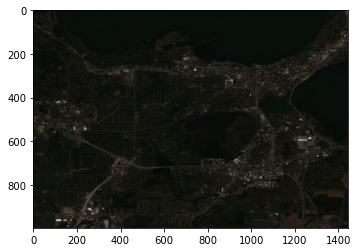

In [86]:


red_n = featuresHyderabad[0,:,:]
green_n=featuresHyderabad[1,:,:]
blue_n=featuresHyderabad[2,:,:]
rgb_composite_n= np.dstack((red_n, green_n, blue_n))

plt.imshow(rgb_composite_n)

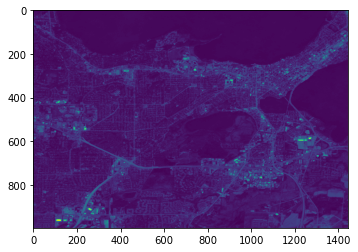

In [72]:

plt.imshow(featuresHyderabad[0,:,:])

In [249]:
X1 = np.array(featuresHyderabad)
X1 = np.transpose(featuresHyderabad,(2,1,0))
X1.shape

(23345, 16361, 3)

In [94]:
a = pyrsgis.ml.array_to_chips(featuresHyderabad, y_size=100, x_size=100)

In [28]:
os.getcwd()

'F:\\akash\\CNN\\CNN_inputs\\Landsat_DHI'

In [47]:
print('Shape of the new features', a.shape)

Shape of the new features (161656, 100, 100, 3)


In [95]:
#plt.imshow(a[65,:,:,0])

In [49]:
newPredicted = model.predict(a)


5052/5052 [==============================] - 11s 2ms/step


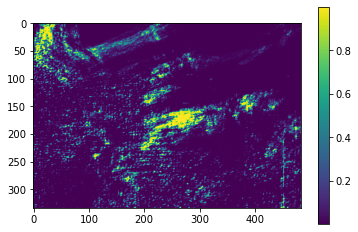

In [90]:
plt.imshow(prediction)
plt.colorbar()